In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("heart_cleveland_upload.csv")

### 1. Exploratory data analysis (EDA)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [5]:
df.nunique()

age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

In [6]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

###########

things to change for visualization(?):
1. sex: sex (1 = male; 0 = female)
2. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
3. exang: exercise induced angina (1 = yes; 0 = no)
4. cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
5. restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
6. slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping
7. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect and the label

don't need to change:
1. age: age in years
2. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
3. chol: serum cholestoral in mg/dl
4. thalach: maximum heart rate achieved
5. oldpeak = ST depression induced by exercise relative to rest
6. ca: number of major vessels (0-3) colored by flourosopy

result:
  condition: 0 = no disease, 1 = disease

###########

In [7]:
df_vis = df.copy()

df_vis["sex"] = df_vis["sex"].map({0: "female", 1:"male"})
df_vis["fbs"] = df_vis["fbs"].map({0: "false", 1:"true"})
df_vis["exang"] = df_vis["exang"].map({0: "no", 1:"yes"})

df_vis["cp"] = df_vis["cp"].map({
    0: "typical angina",
    1: "atypical angina",
    2: "non-anginal pain",
    3: "asymptomatic"
})

df_vis["restecg"] = df_vis["restecg"].map({
    0: "normal",
    1: "ST-T abnormality",
    2: "left ventricular hypertrophy"
})

df_vis["slope"] = df_vis["slope"].map({
    0: "upsloping",
    1: "flat",
    2: "downsloping"
})

df_vis["thal"] = df_vis["thal"].map({
    0: "normal",
    1: "fixed defect",
    2: "reversable defect"
})

df_vis.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,male,typical angina,160,234,true,left ventricular hypertrophy,131,no,0.1,flat,1,normal,0
1,69,female,typical angina,140,239,false,normal,151,no,1.8,upsloping,2,normal,0
2,66,female,typical angina,150,226,false,normal,114,no,2.6,downsloping,0,normal,0
3,65,male,typical angina,138,282,true,left ventricular hypertrophy,174,no,1.4,flat,1,normal,1
4,64,male,typical angina,110,211,false,left ventricular hypertrophy,144,yes,1.8,flat,0,normal,0


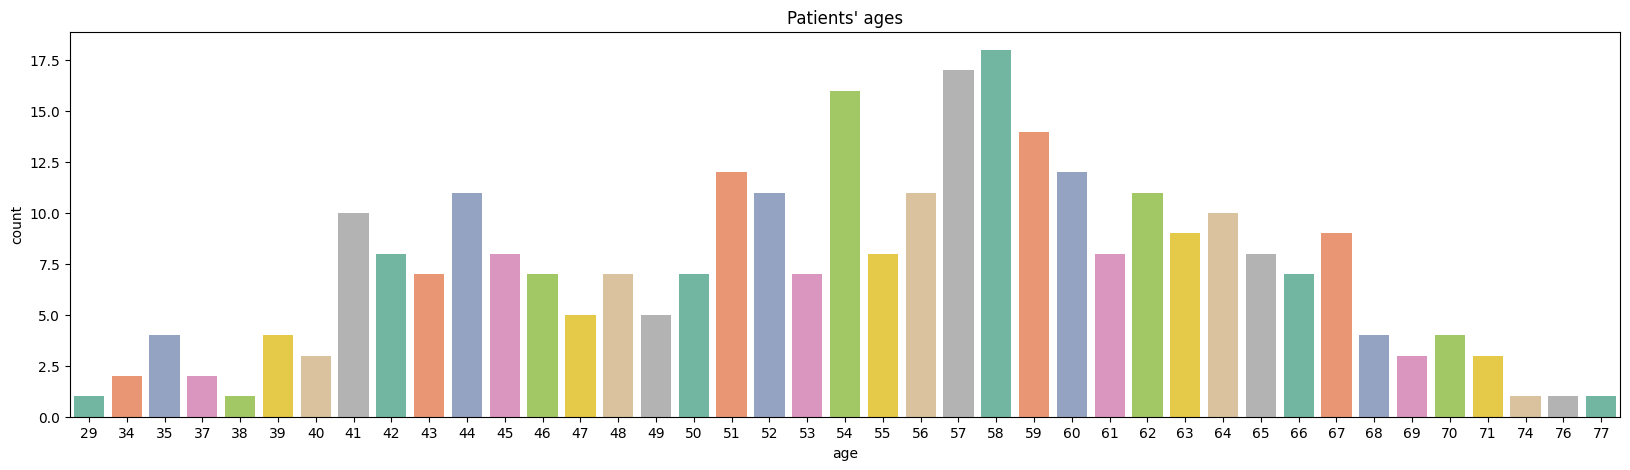

In [8]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df_vis, x='age', palette="Set2")
plt.title("Patients' ages")
plt.show()

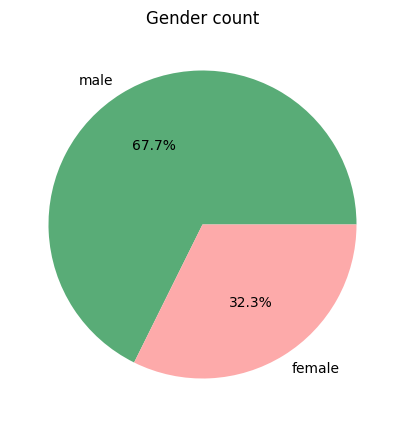

In [9]:
plt.figure(figsize=(5,5))

gender = df_vis["sex"].value_counts()
colors = ["#59AC77", "#FDAAAA"]

plt.pie(gender, labels=gender.index, autopct="%1.1f%%", colors=colors)
plt.title("Gender count")
plt.show()

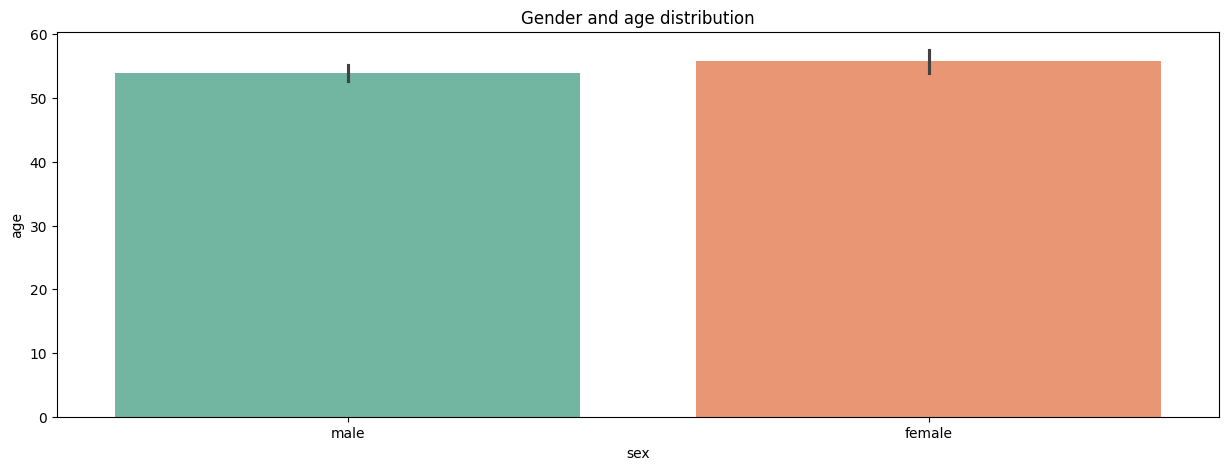

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x="sex", y="age", data=df_vis, palette="Set2")
plt.title("Gender and age distribution")
plt.show()

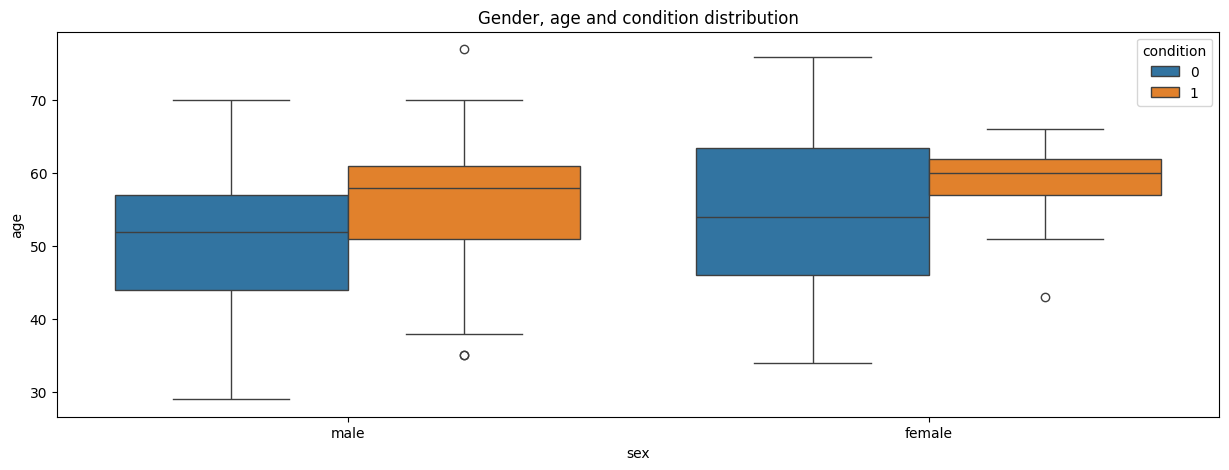

In [11]:
plt.figure(figsize=(15,5))
sns.boxplot(x='sex', y='age', hue='condition', data=df_vis)
plt.title("Gender, age and condition distribution")
plt.show()

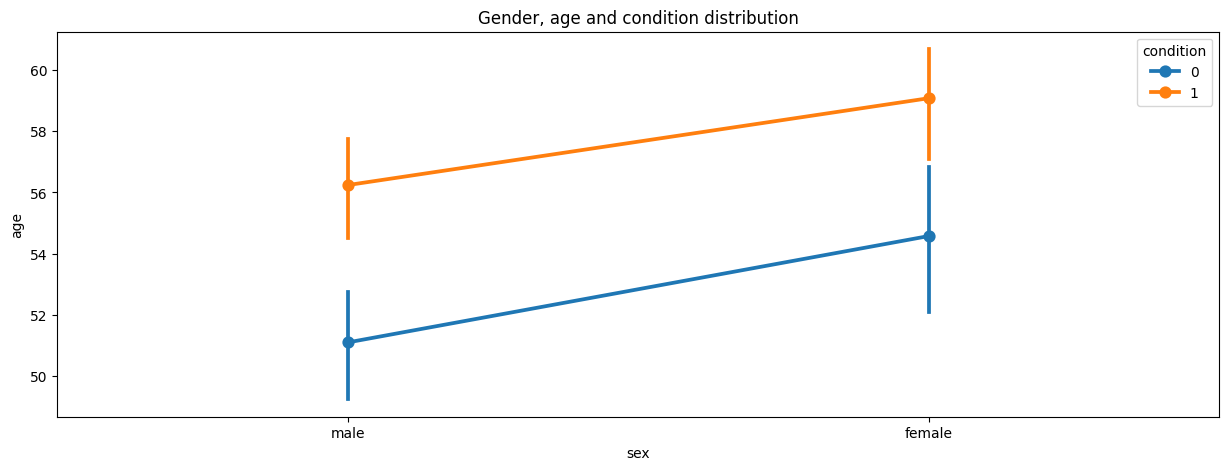

In [12]:
plt.figure(figsize=(15,5))
sns.pointplot(x='sex', y='age', hue='condition', data=df_vis)
plt.title("Gender, age and condition distribution")
plt.show()

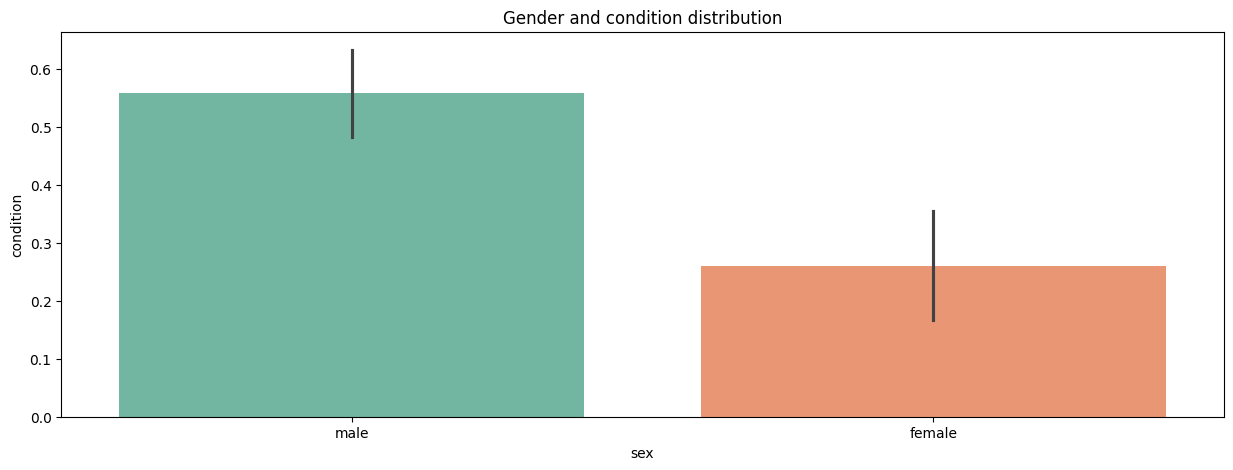

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x="sex", y="condition", data=df_vis, palette="Set2")
plt.title("Gender and condition distribution")
plt.show()

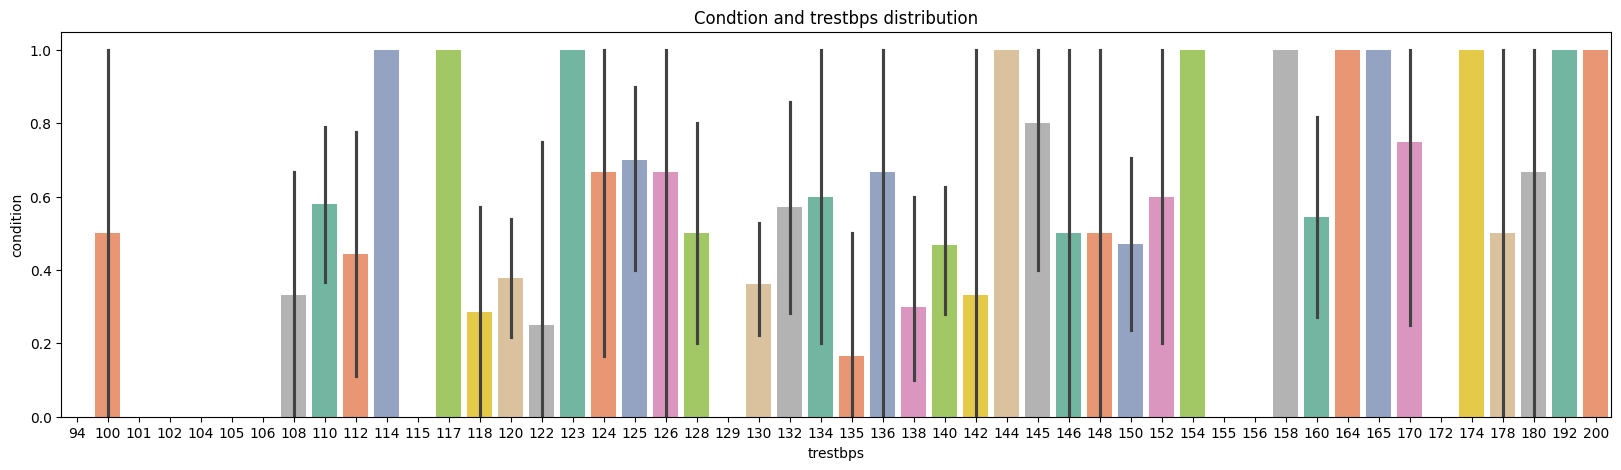

In [14]:
plt.figure(figsize=(20,5))
sns.barplot(x="trestbps", y="condition", data=df_vis, palette="Set2")
plt.title("Condtion and trestbps distribution")
plt.show()

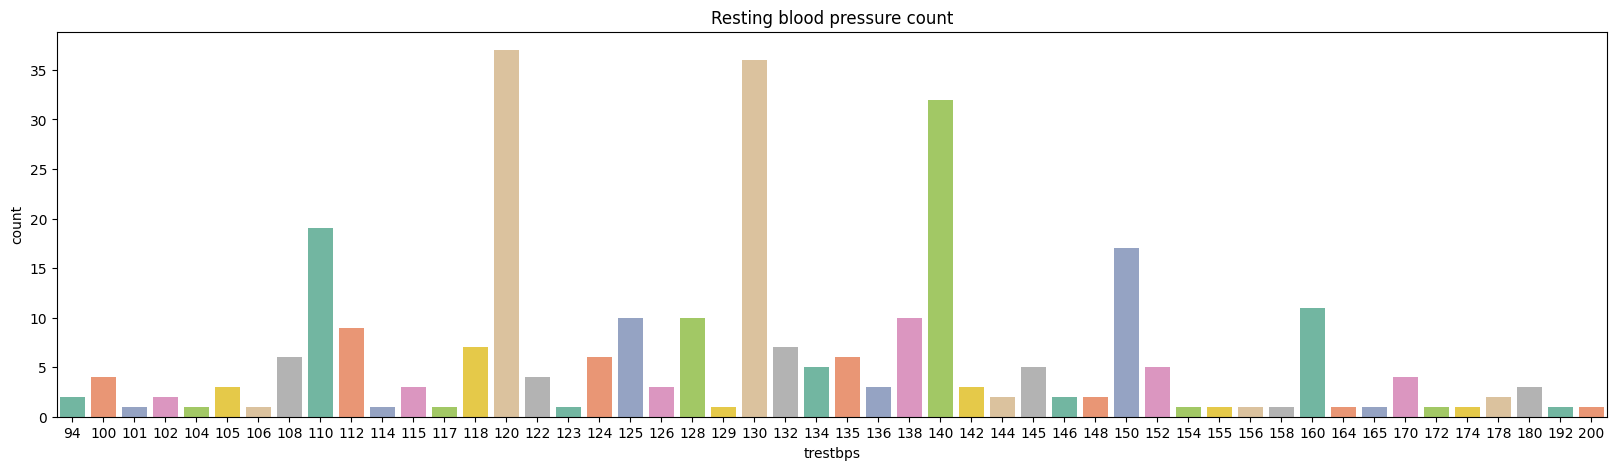

In [15]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df_vis, x='trestbps', palette="Set2")
plt.title("Resting blood pressure count")
plt.show()

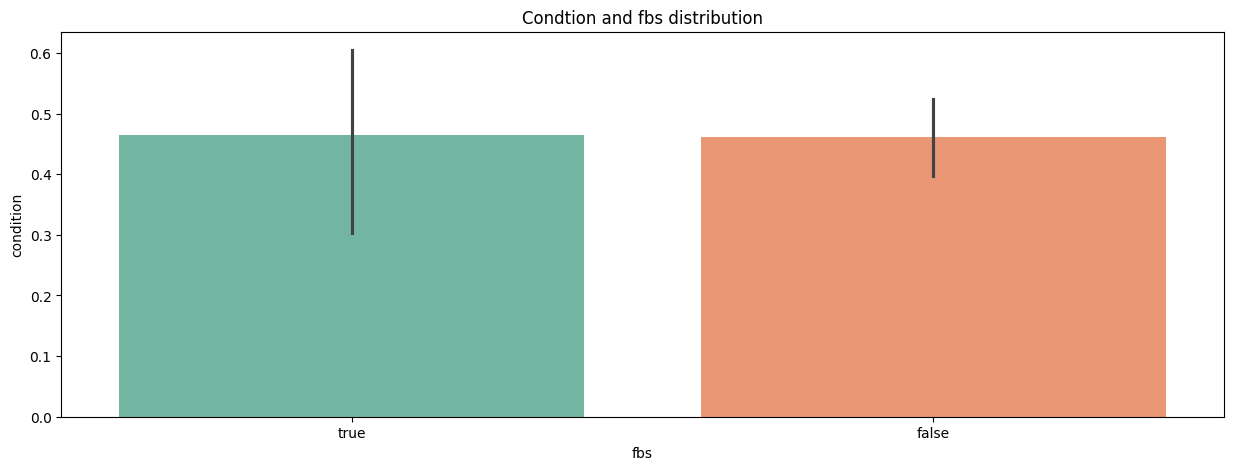

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x="fbs", y="condition", data=df_vis, palette="Set2")
plt.title("Condtion and fbs distribution")
plt.show()

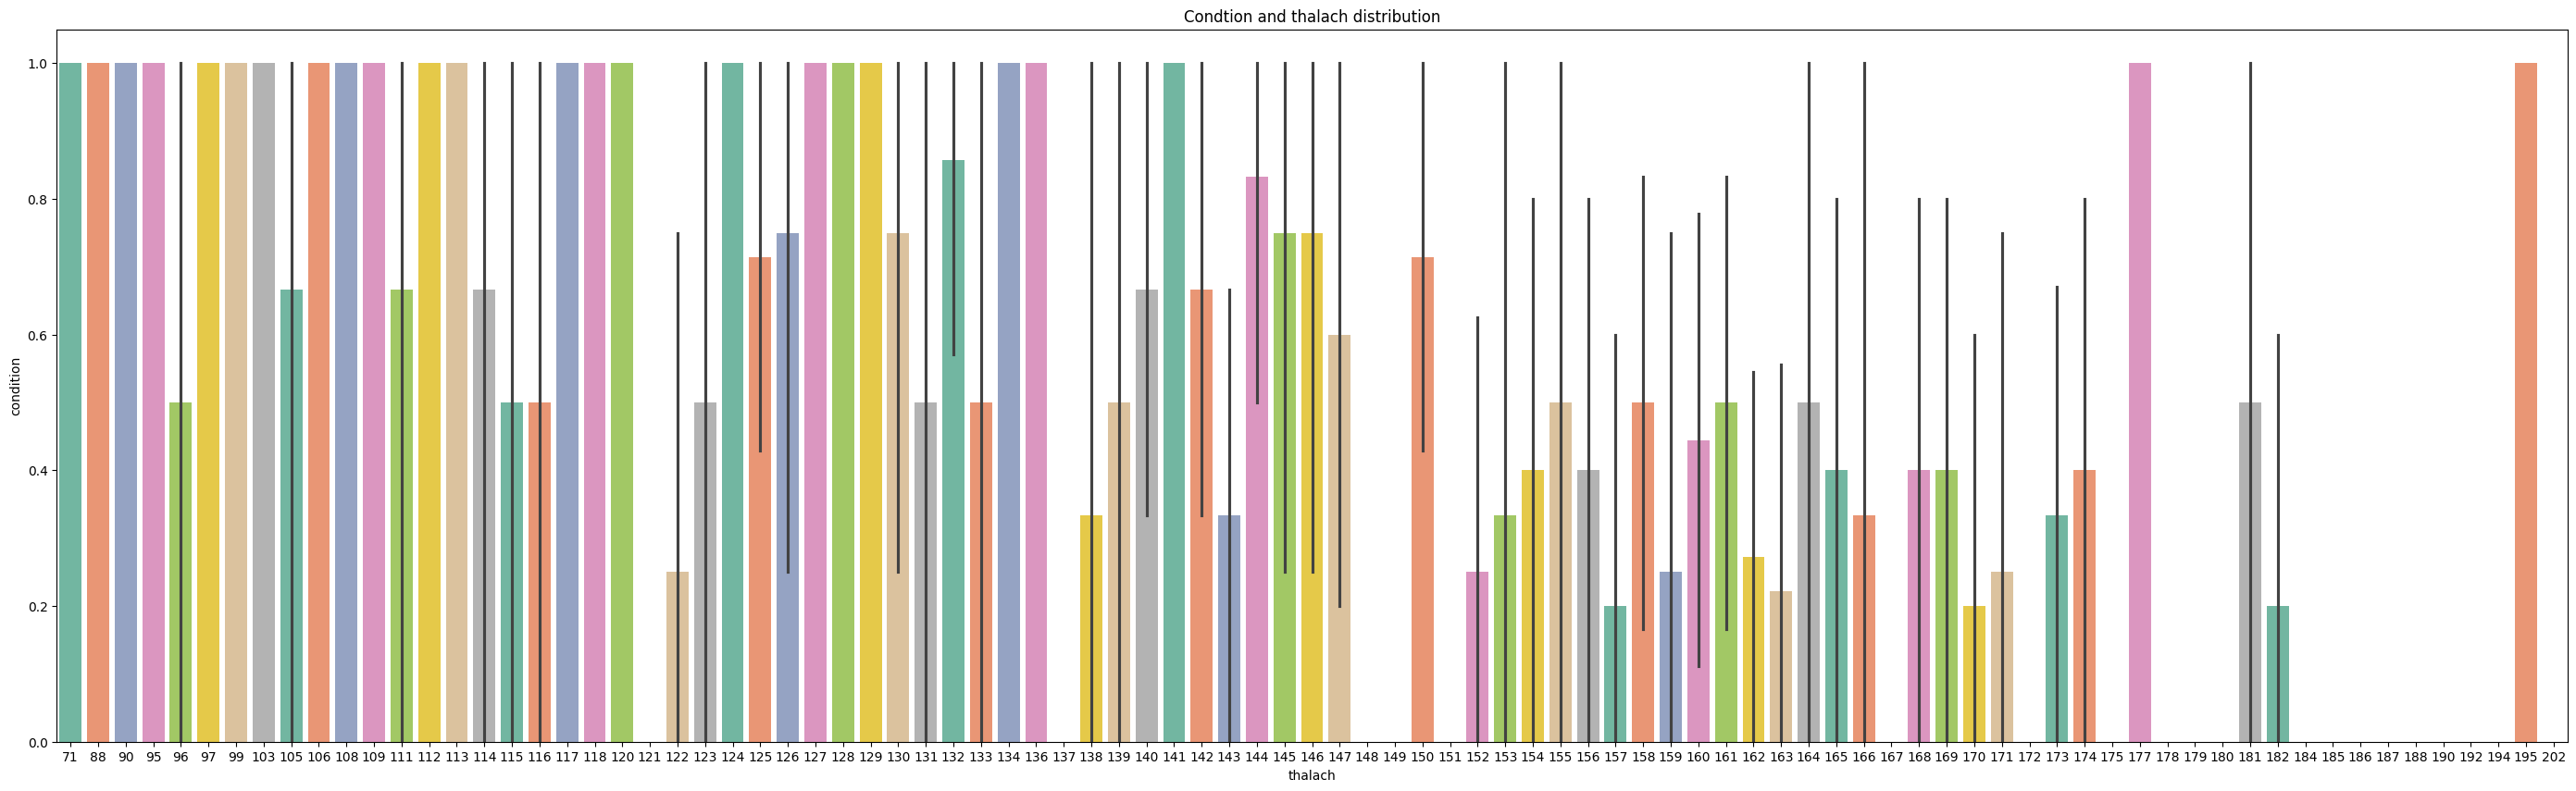

In [17]:
plt.figure(figsize=(35,10))
sns.barplot(x="thalach", y="condition", data=df_vis, palette="Set2")
plt.title("Condtion and thalach distribution")
plt.show()

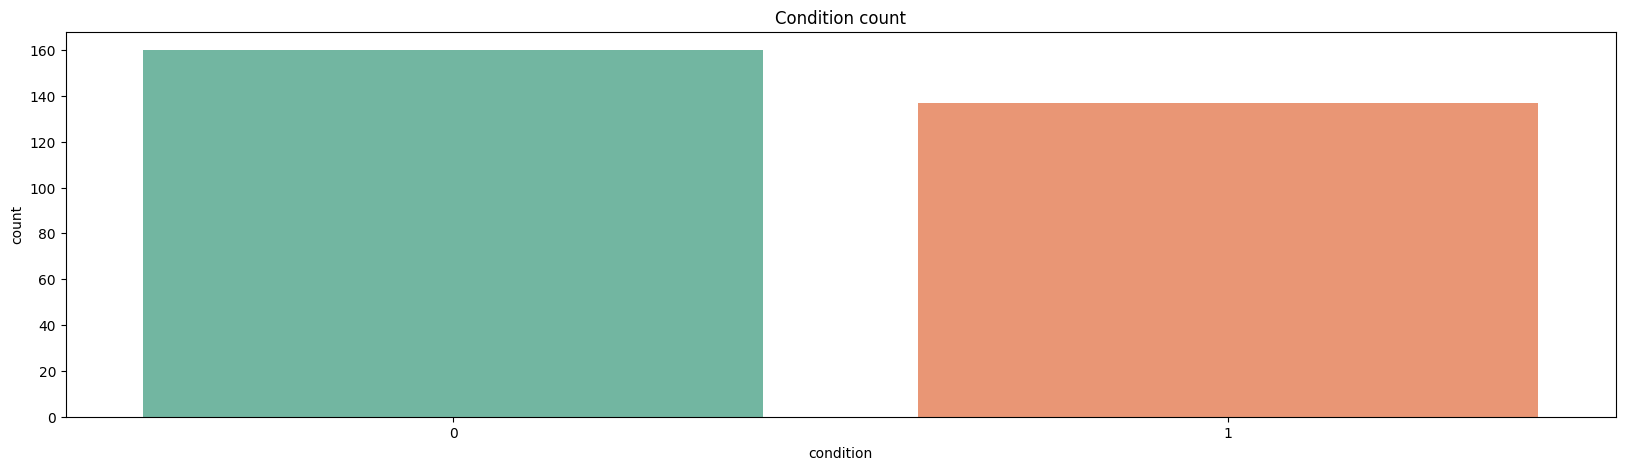

In [18]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df_vis, x='condition', palette="Set2")
plt.title("Condition count")
plt.show()

### 2. data cleaning

In [19]:
# back to original df
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [20]:
df.duplicated().sum()

np.int64(0)

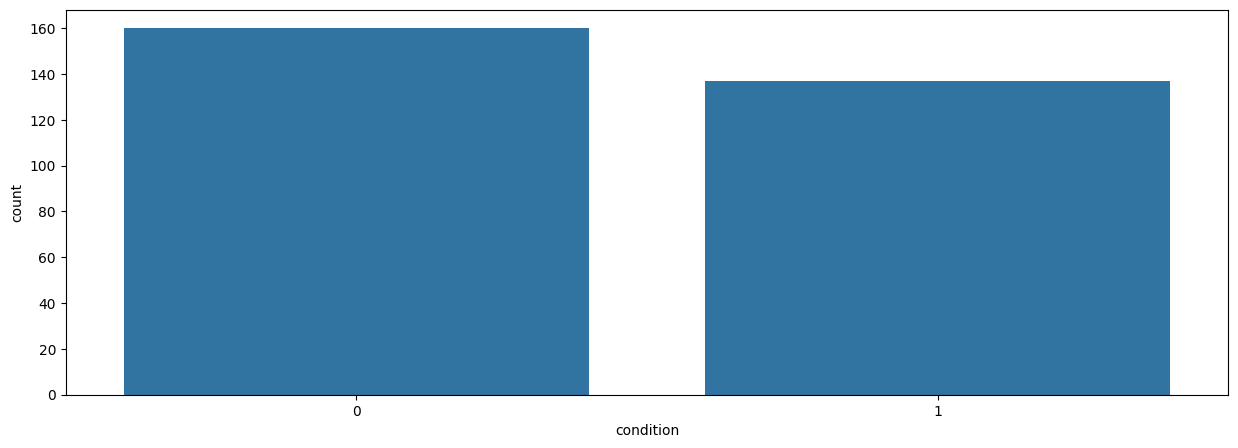

In [21]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='condition')
plt.show()


In [22]:
df.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

### 3. train-test split & preprocessing part


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
X = df.drop("condition", axis=1)
y = df["condition"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4. choosing algorithms

In [27]:
#classification algorithms 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logistic regression

In [28]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
y_train_pr_lr = lr.predict(X_train_scaled)
y_test_pr_lr = lr.predict(X_test_scaled)

print("Train accuracy:", accuracy_score(y_train, y_train_pr_lr))
print("Test accuracy:", accuracy_score(y_test, y_test_pr_lr))
print("\nClassification report:\n", classification_report(y_test, y_test_pr_lr))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_test_pr_lr))

Train accuracy: 0.8396624472573839
Test accuracy: 0.8666666666666667

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.82      0.85        28

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60


Confusion matrix:
 [[29  3]
 [ 5 23]]


KNN

In [29]:
knn = KNeighborsClassifier(n_neighbors=3, weights="distance", metric="minkowski", p=2)
knn.fit(X_train_scaled, y_train)
y_train_pr_knn = knn.predict(X_train_scaled)
y_test_pr_knn = knn.predict(X_test_scaled)

print("Train accuracy:", accuracy_score(y_train, y_train_pr_knn))
print("Test accuracy:", accuracy_score(y_test, y_test_pr_knn))
print("\nClassification report:\n", classification_report(y_test, y_test_pr_knn))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_test_pr_knn))

Train accuracy: 1.0
Test accuracy: 0.8

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.81        32
           1       0.77      0.82      0.79        28

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60


Confusion matrix:
 [[25  7]
 [ 5 23]]


In [30]:
knn2 = KNeighborsClassifier(n_neighbors=5, weights="uniform", metric="minkowski", p=2)
knn2.fit(X_train_scaled, y_train)
y_train_pr_knn2 = knn2.predict(X_train_scaled)
y_test_pr_knn2 = knn2.predict(X_test_scaled)

print("Train accuracy:", accuracy_score(y_train, y_train_pr_knn2))
print("Test accuracy:", accuracy_score(y_test, y_test_pr_knn2))
print("\nClassification report:\n", classification_report(y_test, y_test_pr_knn2))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_test_pr_knn2))

Train accuracy: 0.8818565400843882
Test accuracy: 0.8166666666666667

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.81      0.79      0.80        28

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.82        60
weighted avg       0.82      0.82      0.82        60


Confusion matrix:
 [[27  5]
 [ 6 22]]


In [31]:
knn3 = KNeighborsClassifier(n_neighbors=5, weights="uniform", metric="minkowski", p=1)
knn3.fit(X_train_scaled, y_train)
y_train_pr_knn3 = knn3.predict(X_train_scaled)
y_test_pr_knn3 = knn3.predict(X_test_scaled)

print("Train accuracy:", accuracy_score(y_train, y_train_pr_knn3))
print("Test accuracy:", accuracy_score(y_test, y_test_pr_knn3))
print("\nClassification report:\n", classification_report(y_test, y_test_pr_knn3))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_test_pr_knn3))

Train accuracy: 0.869198312236287
Test accuracy: 0.8333333333333334

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60


Confusion matrix:
 [[28  4]
 [ 6 22]]


In [32]:
knn4 = KNeighborsClassifier(n_neighbors=3, weights="distance", metric="minkowski", p=1)
knn4.fit(X_train_scaled, y_train)
y_train_pr_knn4 = knn4.predict(X_train_scaled)
y_test_pr_knn4 = knn4.predict(X_test_scaled)

print("Train accuracy:", accuracy_score(y_train, y_train_pr_knn4))
print("Test accuracy:", accuracy_score(y_test, y_test_pr_knn4))
print("\nClassification report:\n", classification_report(y_test, y_test_pr_knn4))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_test_pr_knn4))

Train accuracy: 1.0
Test accuracy: 0.8166666666666667

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.79      0.82      0.81        28

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60


Confusion matrix:
 [[26  6]
 [ 5 23]]


SVM

In [34]:
svm = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm.fit(X_train_scaled, y_train)
y_train_pr_svm = svm.predict(X_train_scaled)
y_test_pr_svm = svm.predict(X_test_scaled)

print("Train accuracy:", accuracy_score(y_train, y_train_pr_svm))
print("Test accuracy:", accuracy_score(y_test, y_test_pr_svm))
print("\nClassification report:\n", classification_report(y_test, y_test_pr_svm))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_test_pr_svm))

Train accuracy: 0.9156118143459916
Test accuracy: 0.85

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        32
           1       0.85      0.82      0.84        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60


Confusion matrix:
 [[28  4]
 [ 5 23]]


### 5. summary

In [35]:
#knn
knnSum = pd.DataFrame({
    "KNN": [1, 2, 3, 4],
    "Train accuracy": [
        accuracy_score(y_train, y_train_pr_knn),
        accuracy_score(y_train, y_train_pr_knn2),
        accuracy_score(y_train, y_train_pr_knn3),
        accuracy_score(y_train, y_train_pr_knn4)
    ],
    "Test accuracy": [
        accuracy_score(y_test, y_test_pr_knn),
        accuracy_score(y_test, y_test_pr_knn2),
        accuracy_score(y_test, y_test_pr_knn3),
        accuracy_score(y_test, y_test_pr_knn4)
    ]
})

print(knnSum)

   KNN  Train accuracy  Test accuracy
0    1        1.000000       0.800000
1    2        0.881857       0.816667
2    3        0.869198       0.833333
3    4        1.000000       0.816667


In [ ]:
#all algorithms (i chose knn3 because its test accuracy was better)
summary = pd.DataFrame({
    "Models": ["Linear regression", "KNN", "SVM"],
    "Train accuracy": [
        accuracy_score(y_train, y_train_pr_lr),
        accuracy_score(y_train, y_train_pr_knn3),
        accuracy_score(y_train, y_train_pr_svm),
    ],
    "Test accuracy": [
        accuracy_score(y_test, y_test_pr_lr),
        accuracy_score(y_test, y_test_pr_knn3),
        accuracy_score(y_test, y_test_pr_svm),
    ]
})

print(summary)

              Models  Train accuracy  Test accuracy
0  Linear regression        0.839662       0.866667
1                KNN        0.869198       0.833333
2                SVM        0.915612       0.850000
